#TEMPERATURE PREDICTION in CalCOFI dataset

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [ ]:
np.random.seed(42)

Load Dataset

In [ ]:
#import dataset
#file_dir = 'D:\Sini-Project\Datasets\CalCOFI'
file1='bottle.csv'
file2 = 'cast.csv'

dataset = pd.read_csv(file1)
print(dataset.shape)
print(dataset.columns)

<ipython-input-42-eff83e3efd8e>:6: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file1)


(864863, 74)
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [ ]:
print(dataset.head())

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [ ]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


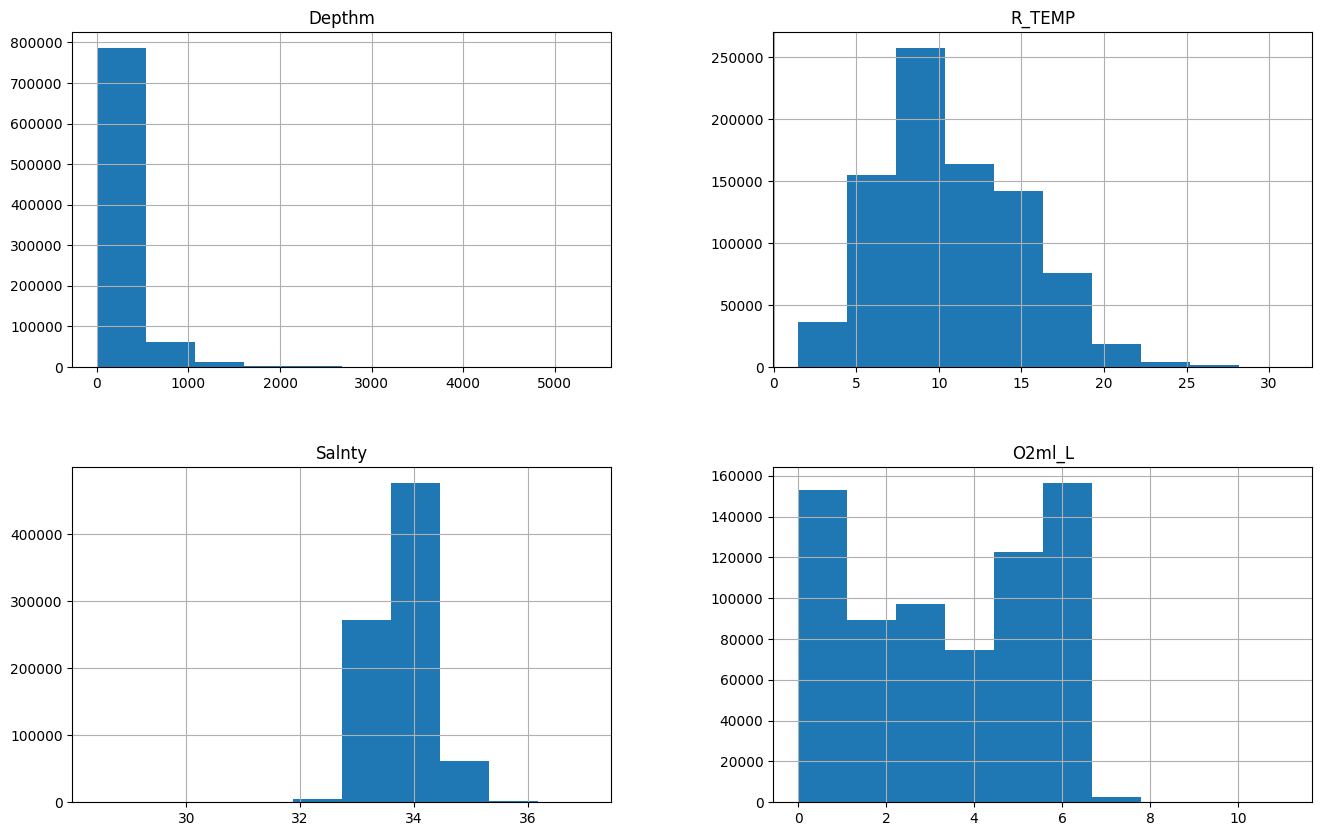

In [ ]:
data1 = dataset.loc[:, ['Depthm', 'R_TEMP', 'Salnty', 'O2ml_L']].copy()
hist1 = data1.hist(bins=10, figsize=(16,10))
#print(data1.columns)

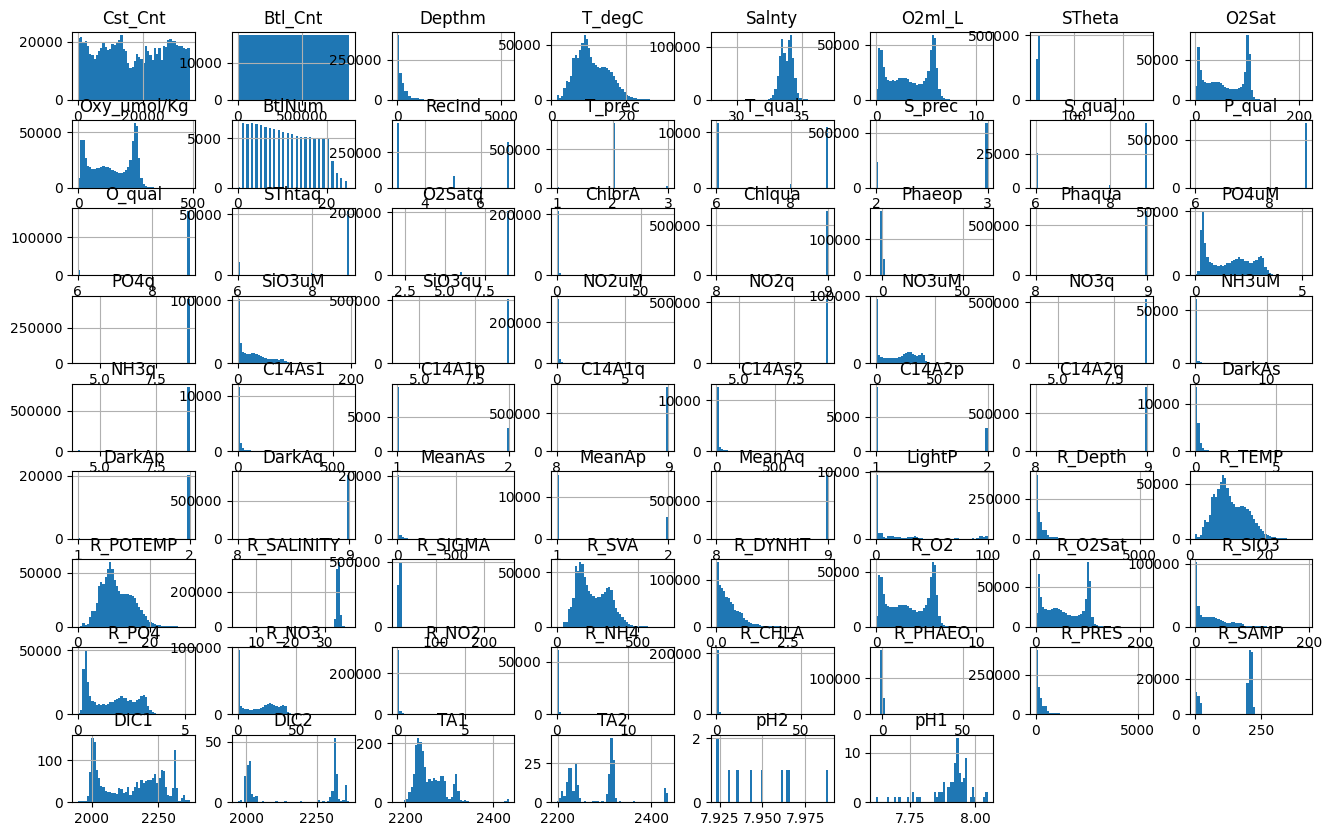

In [ ]:
hist = dataset.hist(bins=50, figsize=(16,10))

Nan Analysis

<Axes: >

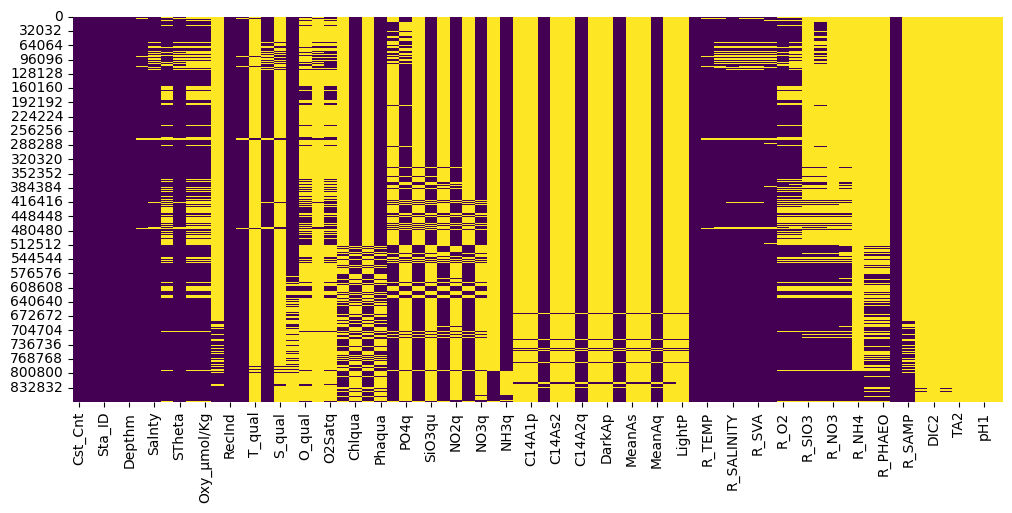

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,5)
sns.heatmap(dataset.isna(),cbar=False,cmap='viridis')

In [ ]:
feature_sub = ['R_TEMP', 'R_SALINITY', 'Depthm', 'O2ml_L', 'SiO3uM', 'PO4uM', 'NO2uM', 'NO3uM','ChlorA', 'C14As1', 'STheta', 'R_PRES', 'NH3uM', 'R_SVA', 'R_DYNHT']
#reported_features = ['R_Depth','R_SALINITY', 'R_02','R_O2Sat','R_PO4', 'R_SIO3', 'R_NO3', 'R_NO2', 'R_CHLA', 'R_PHAEO', 'R_SIGMA', 'R_PRES', 'R_NH4']

<Axes: >

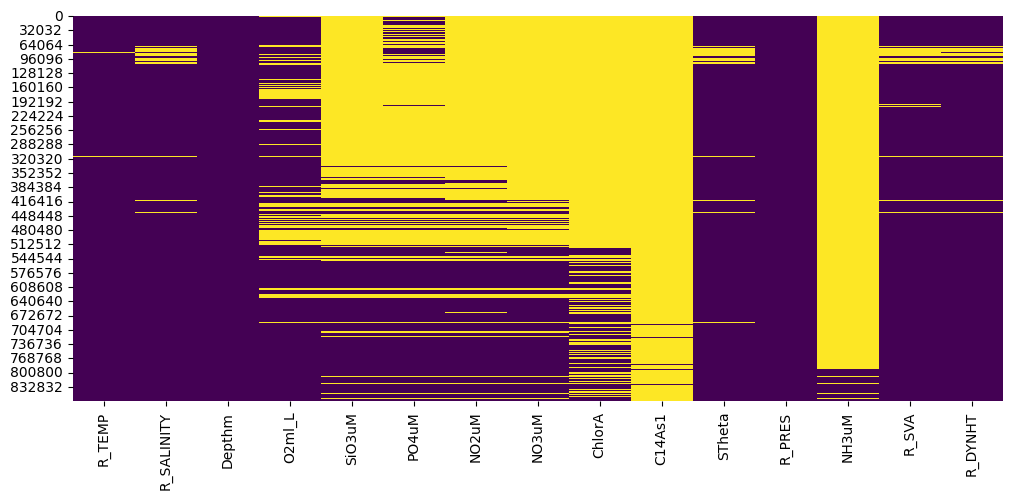

In [ ]:
sns.heatmap(dataset[feature_sub].isna(),cbar=False,cmap='viridis')

#BASELINE

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_base_set, test_base_set = train_test_split(dataset, test_size=0.2)
print(train_base_set.shape)
print(test_base_set.shape)

(691890, 74)
(172973, 74)


Exploratory Data Analysis

array([[<Axes: xlabel='R_TEMP', ylabel='R_TEMP'>,
        <Axes: xlabel='R_SALINITY', ylabel='R_TEMP'>,
        <Axes: xlabel='Depthm', ylabel='R_TEMP'>,
        <Axes: xlabel='O2ml_L', ylabel='R_TEMP'>,
        <Axes: xlabel='SiO3uM', ylabel='R_TEMP'>,
        <Axes: xlabel='PO4uM', ylabel='R_TEMP'>,
        <Axes: xlabel='NO2uM', ylabel='R_TEMP'>,
        <Axes: xlabel='NO3uM', ylabel='R_TEMP'>,
        <Axes: xlabel='ChlorA', ylabel='R_TEMP'>,
        <Axes: xlabel='C14As1', ylabel='R_TEMP'>,
        <Axes: xlabel='STheta', ylabel='R_TEMP'>,
        <Axes: xlabel='R_PRES', ylabel='R_TEMP'>,
        <Axes: xlabel='NH3uM', ylabel='R_TEMP'>,
        <Axes: xlabel='R_SVA', ylabel='R_TEMP'>,
        <Axes: xlabel='R_DYNHT', ylabel='R_TEMP'>],
       [<Axes: xlabel='R_TEMP', ylabel='R_SALINITY'>,
        <Axes: xlabel='R_SALINITY', ylabel='R_SALINITY'>,
        <Axes: xlabel='Depthm', ylabel='R_SALINITY'>,
        <Axes: xlabel='O2ml_L', ylabel='R_SALINITY'>,
        <Axes: xlabel='SiO3uM

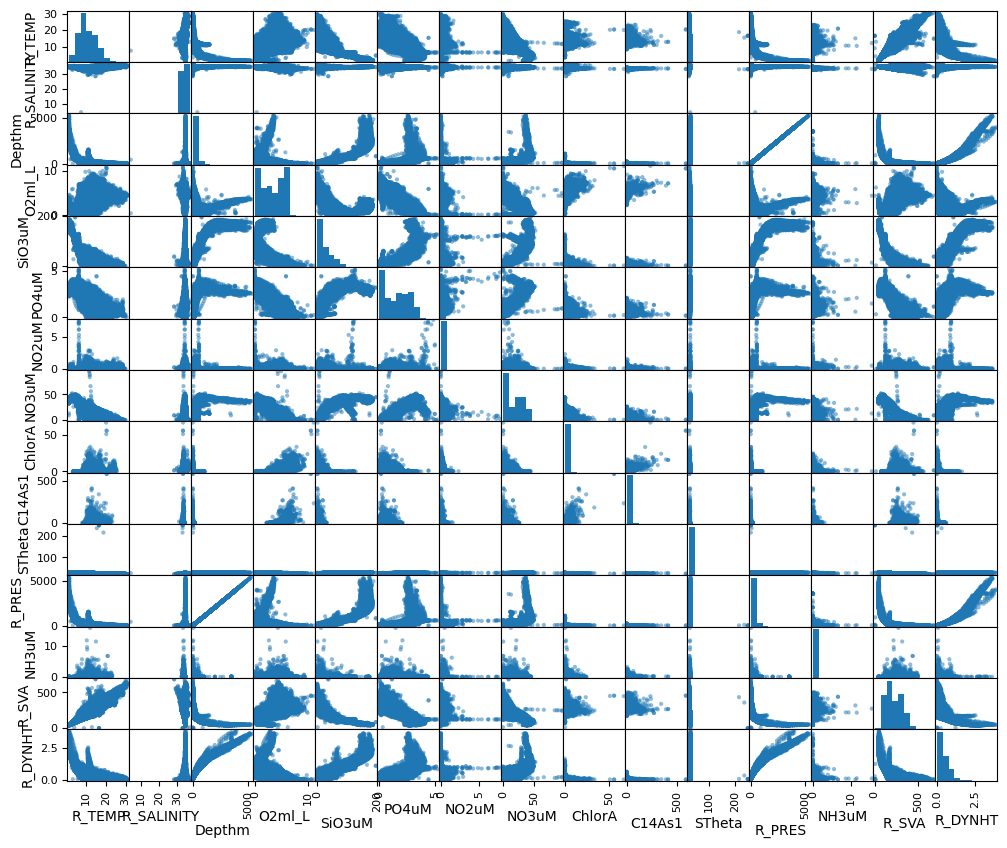

In [ ]:
pd.plotting.scatter_matrix(train_base_set[feature_sub], figsize=(12, 10))

Correlation

In [ ]:
corr_matrix = train_base_set[feature_sub].corr()
print(corr_matrix)

              R_TEMP  R_SALINITY    Depthm    O2ml_L    SiO3uM     PO4uM  \
R_TEMP      1.000000   -0.503928 -0.681577  0.796116 -0.840558 -0.904585   
R_SALINITY -0.503928    1.000000  0.571051 -0.820523  0.796396  0.825889   
Depthm     -0.681577    0.571051  1.000000 -0.592369  0.846251  0.666499   
O2ml_L      0.796116   -0.820523 -0.592369  1.000000 -0.893516 -0.973369   
SiO3uM     -0.840558    0.796396  0.846251 -0.893516  1.000000  0.914846   
PO4uM      -0.904585    0.825889  0.666499 -0.973369  0.914846  1.000000   
NO2uM       0.099884   -0.153381 -0.160588  0.192219 -0.169131 -0.142266   
NO3uM      -0.925578    0.849101  0.686397 -0.969882  0.912479  0.987348   
ChlorA      0.108411   -0.029886 -0.280127  0.270804 -0.177744 -0.179124   
C14As1     -0.013424    0.196883 -0.264233  0.302011  0.011326 -0.033193   
STheta     -0.803423    0.582898  0.565100 -0.889724  0.864639  0.948405   
R_PRES     -0.680231    0.569834  0.999994 -0.590572  0.844440  0.664690   
NH3uM       

plotting the heatmap for correlation

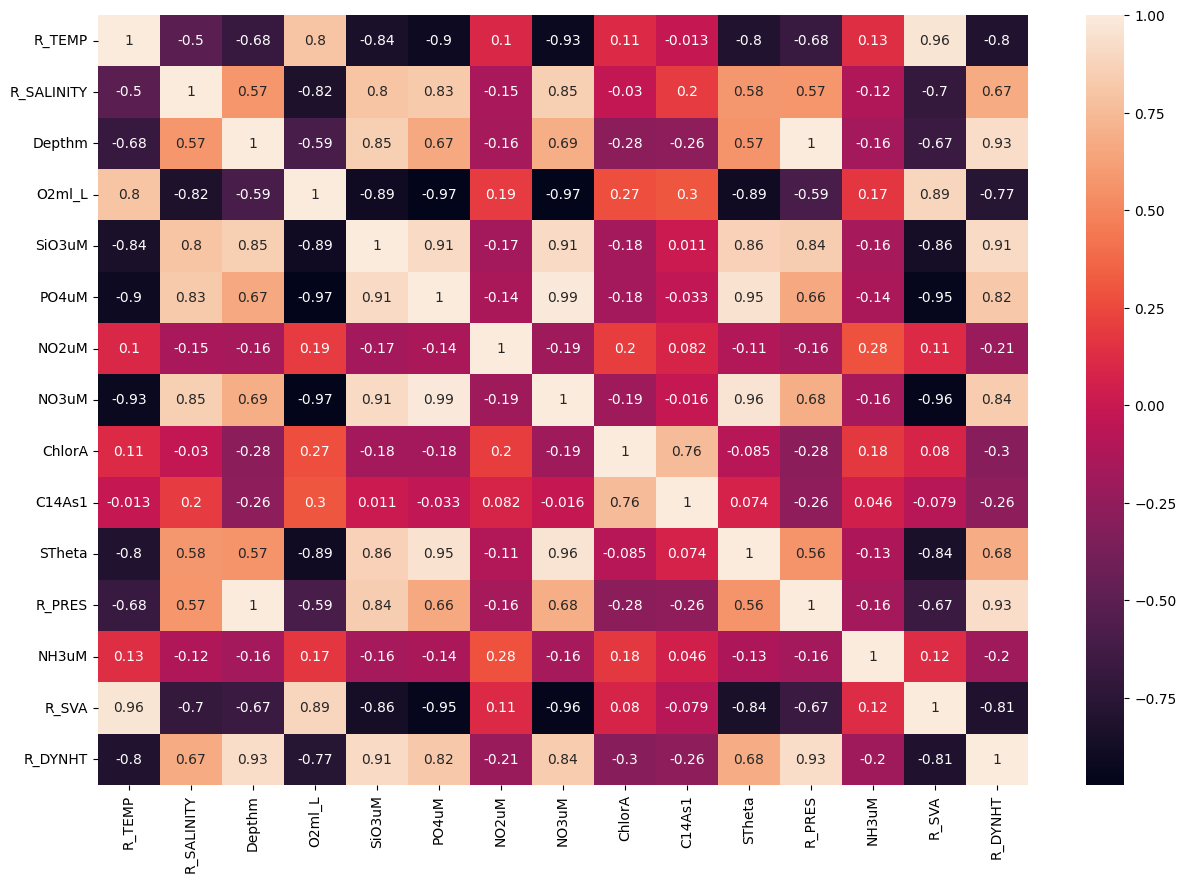

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
corr_heat = sns.heatmap(corr_matrix, annot=True)

Sort using temperature

In [ ]:
#sort using temperature
corr_matrix['R_TEMP'].sort_values(ascending=False)
list(corr_matrix['R_TEMP'].sort_values(ascending=False))

[1.0,
 0.9641698901782737,
 0.7961156842941032,
 0.13275300392629888,
 0.10841102790848027,
 0.09988380579179748,
 -0.013423739396506453,
 -0.50392849706769,
 -0.6802311409899403,
 -0.6815765822110189,
 -0.799293086214306,
 -0.8034234286660962,
 -0.8405576369972098,
 -0.9045846537069258,
 -0.9255782074613622]

Percentage of instances with readings for temperature

In [ ]:
print(len(dataset), ', Nan values=', dataset['T_degC'].isna().sum(), ', Percentage=', round(dataset['T_degC'].isna().sum()/len(dataset),3)*100, '%')

864863 , Nan values= 10963 , Percentage= 1.3 %


Checking for reported temperature

In [ ]:
print(len(dataset), ', Nan values=', dataset['R_TEMP'].isna().sum(), ', Percentage=', round(dataset['R_TEMP'].isna().sum()/len(dataset),3)*100, '%')

864863 , Nan values= 10963 , Percentage= 1.3 %


In [ ]:
print(len(dataset), ', Nan values=', dataset['R_POTEMP'].isna().sum(), ', Percentage=', round(dataset['R_POTEMP'].isna().sum()/len(dataset),3)*100, '%')

864863 , Nan values= 46047 , Percentage= 5.3 %


Choose R_TEMP as target data due to less missing values compared to T_degC &  R_POTEMP

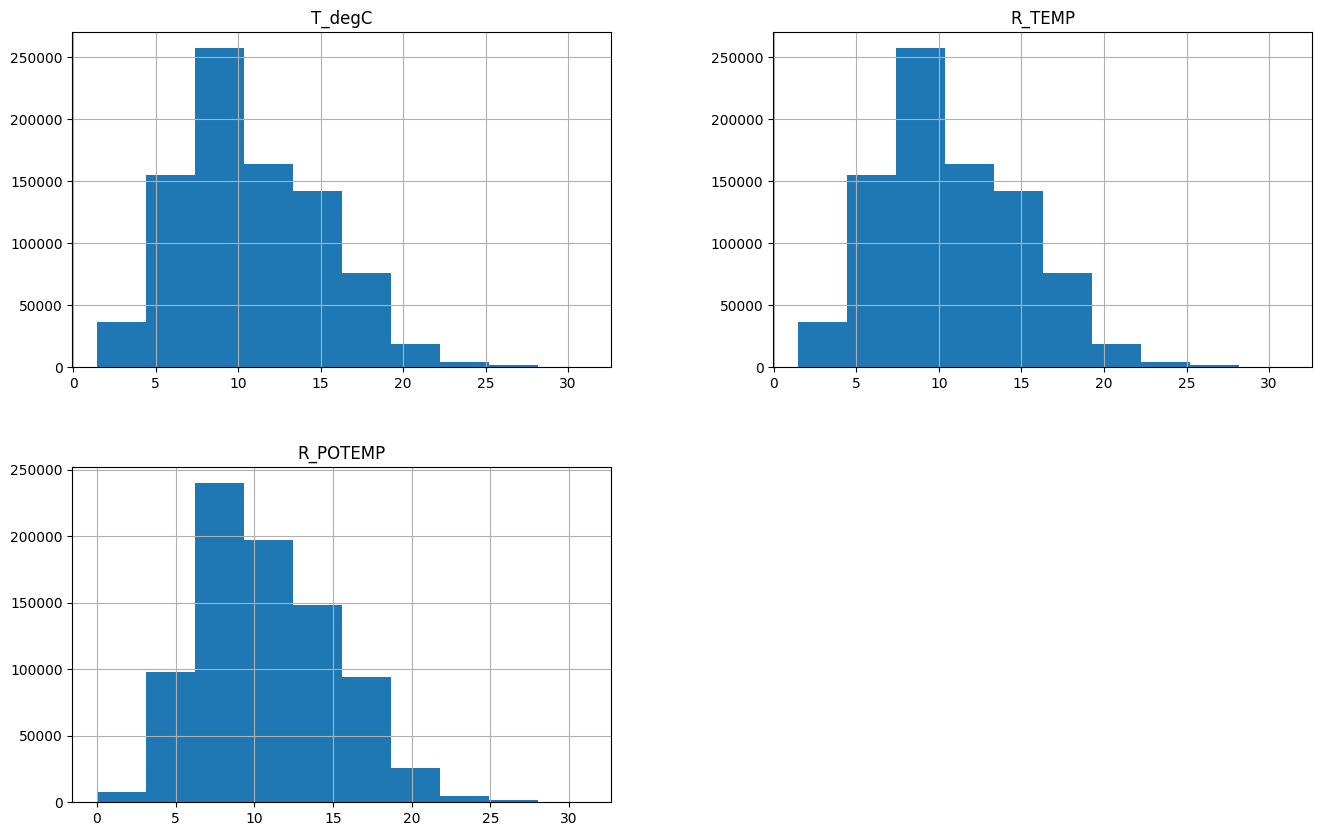

In [ ]:
data2 = dataset.loc[:, ['T_degC', 'R_TEMP', 'R_POTEMP']].copy()
hist2 = data2.hist(bins=10, figsize=(16,10))
#print(data1.columns)

In [ ]:
len(dataset[~dataset['R_TEMP'].isna()])
dataset_copy = dataset[~dataset['R_TEMP'].isna()]
print(dataset.shape)
print(dataset_copy.shape)

(864863, 74)
(853900, 74)


#Prepare Data for ML algorithms

1. Remove instances with no readings for temperature

In [ ]:
train_base = train_base_set.loc[~train_base_set['R_TEMP'].isna()]
print(train_base.shape)

test_base = test_base_set.loc[~test_base_set['R_TEMP'].isna()]

(683141, 74)


In [ ]:
print(train_base.shape)
print(test_base.shape)

(683223, 74)
(170677, 74)


In [ ]:
drop_attributes = ['Cst_Cnt','Btl_Cnt','Sta_ID', 'Depth_ID', 'BtlNum', 'IncTim', 'DIC Quality Comment']
cat_attributes =['RecInd']
#cat_attributes = ['Cst_Cnt', 'Btl_Cnt','Sta_ID', 'Depth_ID','IncTim', 'DIC Quality Comment']

2. Separate target variable, temperature and features

In [ ]:
X_train_base = train_base.drop(['T_degC', 'R_TEMP','T_prec','T_qual','R_POTEMP'], axis=1)
X_train_base = X_train_base.drop(drop_attributes, axis=1)
X_train_base.columns

Index(['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'RecInd', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq',
       'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM',
       'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1',
       'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp',
       'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [ ]:
y_train_base = train_base['R_TEMP'].copy()

3. Missing Values

Categorical attributes

In [ ]:
X_train_base['RecInd'].value_counts()

RecInd
3    359362
7    256762
5     64626
6      2471
4         2
Name: count, dtype: int64

Numerical attributes, fill with median values

In [ ]:
X_train_base_num = X_train_base.drop(cat_attributes, axis=1)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [ ]:
print(type(X_train_base), ', ', X_train_base.shape)
print(type(X_train_base_num), ', ', X_train_base_num.shape)

<class 'pandas.core.frame.DataFrame'> ,  (683141, 62)
<class 'pandas.core.frame.DataFrame'> ,  (683141, 61)


Preprocess Categorical values

In [ ]:
print(X_train_base['RecInd'].value_counts())
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, list(X_train_base_num)),
    ('cat', OneHotEncoder(),  ["RecInd"])
])

RecInd
3    359710
7    256579
5     64360
6      2490
4         2
Name: count, dtype: int64


In [ ]:
#Tranform data
X_train_base_tr = full_pipeline.fit_transform(X_train_base)
print(X_train_base_tr[:2, -8:])
print(X_train_base_tr.shape)

[[-8.12359740e-03 -7.63473607e-06  1.78585571e-03  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.12359740e-03 -7.63473607e-06  1.78585571e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(683141, 66)


In [ ]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Depthm', 'Salnty', 'O2ml_L', 'STheta',
                                  'O2Sat', 'Oxy_µmol/Kg', 'S_prec', 'S_qual',
                                  'P_qual', 'O_qual', 'SThtaq', 'O2Satq',
                                  'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua',
                                  'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM',
                                  'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q',
                                  'C14As1', 'C14A1p', 'C14A1q', 'C14As2', ...]),
                                ('cat', OneHotEncoder(), ['RecInd'])])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_base_regr = LinearRegression()
lin_base_regr.fit(X_train_base_tr, y_train_base)

LinearRegression()

In [ ]:
y_lin_pred = lin_base_regr.predict(X_train_base_tr)

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(y_train_base, y_lin_pred))
print(lin_rmse)

0.683829898260286


#Stratified Sampling with strata as depth

Train Test Split based with stratified sampling based on depth

<Axes: >

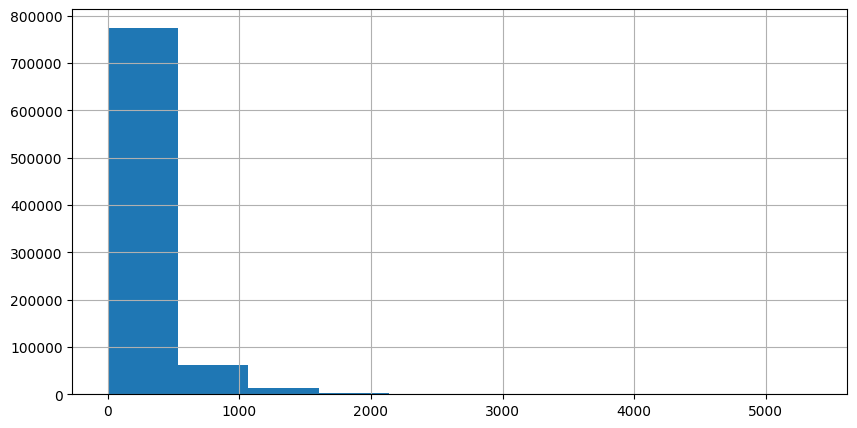

In [ ]:
dataset_copy["Depthm"].hist(bins=10, figsize=(10,5))

In [ ]:
depth_bins = np.arange(0,1000, 100)
import numpy as np
#depth_bins = np.arange(0,1500, 250)
depth_bins = np.append(depth_bins, [np.inf])
print(depth_bins)

[  0. 100. 200. 300. 400. 500. 600. 700. 800. 900.  inf]


In [ ]:
depth_labels = np.arange(1, len(depth_bins))
print('labels=', depth_labels, len(depth_labels))

labels= [ 1  2  3  4  5  6  7  8  9 10] 10


In [ ]:
print(dataset_copy[dataset_copy['Depthm'].isna()].index)
print(dataset_copy[dataset_copy['T_degC'].isna()])

Index([], dtype='int64')
Empty DataFrame
Columns: [Cst_Cnt, Btl_Cnt, Sta_ID, Depth_ID, Depthm, T_degC, Salnty, O2ml_L, STheta, O2Sat, Oxy_µmol/Kg, BtlNum, RecInd, T_prec, T_qual, S_prec, S_qual, P_qual, O_qual, SThtaq, O2Satq, ChlorA, Chlqua, Phaeop, Phaqua, PO4uM, PO4q, SiO3uM, SiO3qu, NO2uM, NO2q, NO3uM, NO3q, NH3uM, NH3q, C14As1, C14A1p, C14A1q, C14As2, C14A2p, C14A2q, DarkAs, DarkAp, DarkAq, MeanAs, MeanAp, MeanAq, IncTim, LightP, R_Depth, R_TEMP, R_POTEMP, R_SALINITY, R_SIGMA, R_SVA, R_DYNHT, R_O2, R_O2Sat, R_SIO3, R_PO4, R_NO3, R_NO2, R_NH4, R_CHLA, R_PHAEO, R_PRES, R_SAMP, DIC1, DIC2, TA1, TA2, pH2, pH1, DIC Quality Comment]
Index: []

[0 rows x 74 columns]


In [ ]:
dataset_copy['depth_cat'] = pd.cut(dataset_copy['Depthm'],
                   bins = depth_bins,
                   labels = depth_labels)

<ipython-input-26-318d15560429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['depth_cat'] = pd.cut(dataset_copy['Depthm'],


In [ ]:
dataset_copy.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment', 'depth_cat'],
      dtype='object')

In [ ]:
depth_cat_na = dataset_copy[dataset_copy['depth_cat'].isna()]
print(depth_cat_na.loc[:, ['Depthm']].value_counts())

Depthm
0         32344
Name: count, dtype: int64


depth = 0 is added to first bin

In [ ]:
dataset_copy['depth_cat'] = dataset_copy['depth_cat'].fillna(1)

<ipython-input-30-4462db4955ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['depth_cat'] = dataset_copy['depth_cat'].fillna(1)


In [ ]:
print(dataset_copy.shape)
print(dataset_copy['depth_cat'].shape)

(853900, 75)
(853900,)


<Axes: >

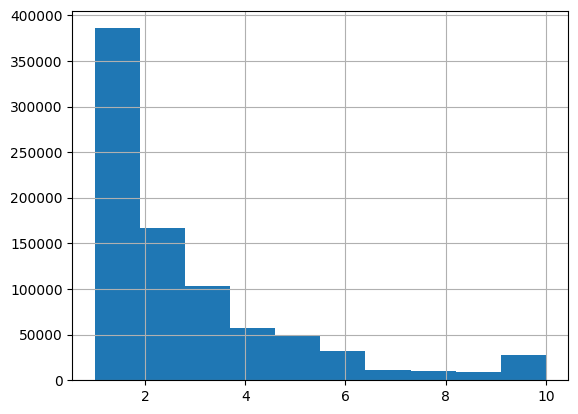

In [ ]:
dataset_copy['depth_cat'].hist()

In [ ]:
dataset_copy['depth_cat'].value_counts(), dataset_copy['depth_cat'].value_counts()/len(dataset)*100

(depth_cat
 1     385978
 2     167031
 3     102941
 4      57825
 5      49328
 6      31917
 10     28228
 7      11660
 8       9987
 9       9005
 Name: count, dtype: int64,
 depth_cat
 1     44.628802
 2     19.313001
 3     11.902579
 4      6.686030
 5      5.703562
 6      3.690411
 10     3.263870
 7      1.348190
 8      1.154749
 9      1.041205
 Name: count, dtype: float64)

In [ ]:
len(dataset_copy[dataset_copy['depth_cat'].isna()])
dataset_copy[dataset_copy['depth_cat'].isna()].index

Index([], dtype='int64')

In [ ]:
len(dataset_copy[dataset_copy['Depthm'].isna()])
dataset_copy[dataset_copy['Depthm'].isna()].index

Index([], dtype='int64')

In [ ]:
len(dataset_copy[dataset_copy['T_degC'].isna()])
dataset_copy[dataset_copy['T_degC'].isna()].index

Index([], dtype='int64')

In [ ]:
dataset_copy = dataset_copy.ffill()
dataset_copy = dataset_copy.bfill()
print(len(dataset_copy[dataset_copy['depth_cat'].isna()]))
dataset_copy[dataset_copy['depth_cat'].isna()].index

0


Index([], dtype='int64')

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split_obj = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
gen_obj = split_obj.split(dataset_copy, dataset_copy['depth_cat'])

Only 1 iterator because, n_split is 1

In [ ]:
for i, (train_index, test_index) in enumerate(gen_obj):
    print(i,'. ',train_index, ', ', test_index)

0 .  [803412 734740 166828 ...  77668 708403 424478] ,  [ 97971 197869 811653 ... 734756 287710 616769]


In [ ]:
print(len(train_index))
print(len(test_index))

683120
170780


Split dataset

In [ ]:
dataset_copy.drop(['depth_cat'], axis=1, inplace=True)
dataset_copy.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [ ]:
strat_train_set_all = dataset_copy.iloc[train_index]
strat_test_set_all = dataset_copy.iloc[test_index]

In [ ]:
print(len(strat_train_set_all))
print(len(strat_test_set_all))

683120
170780


Preprocessing

In [ ]:
drop_attributes = ['Cst_Cnt','Btl_Cnt','Sta_ID', 'Depth_ID', 'BtlNum', 'IncTim', 'DIC Quality Comment']
#categorical columns
cat_attributes =['RecInd']

Cst_Cnt
34070
---------
Btl_Cnt
683120
---------
Sta_ID
2572
---------
Depth_ID
683111
---------
RecInd
5
---------
BtlNum
26
---------
IncTim
194
---------
DIC Quality Comment
37
---------


Separate target variable, temperature and features

In [ ]:
X_train = strat_train_set_all.drop(['T_degC', 'R_TEMP','T_prec','T_qual','R_POTEMP'], axis=1)
X_train = X_train.drop(drop_attributes, axis=1)
y_train = strat_train_set_all['R_TEMP'].copy()

Transform the data

In [ ]:
X_train_tr = full_pipeline.fit_transform(X_train)
print(X_train_tr[:2, -8:])
print(X_train_tr.shape)

Learn the model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_base_regr = LinearRegression()
lin_base_regr.fit(X_train_tr, y_train)

Predict on training data

In [ ]:
y_lin_pred = lin_base_regr.predict(X_train_tr)

Evaluate

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(y_train_base, y_lin_pred))
print(lin_rmse)